
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I will be analyzing a data set containing information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

The questions I will be addressing are:

>1. Which genre is most common and which is least common over the last decade?

>2. What is the difference between the properties associated with high revenue movies and low revenue ones?

>3. Is there a relation between budget and revenue? (in other words can we assume that the more you spend on a movie the higher its outcome?)

>4. What is the profit behaviour through the years?

>5. Is there a relation between popularity and profit?

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [395]:
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [396]:
df.shape

(10866, 21)

In [397]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

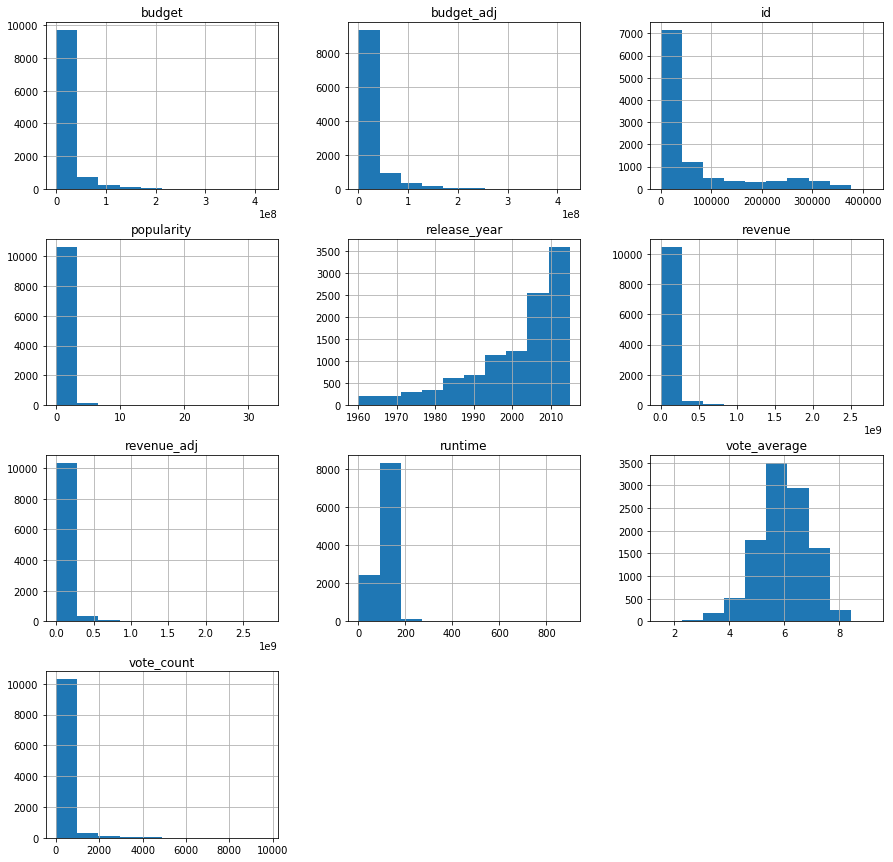

In [399]:
#looking at the data graphically
df.hist(figsize=(15,15));

In [400]:
# In this step I added a column for date, it arranges the rows ascendingly according to the release data, I just wanted to 
# dissplay them arranged 
df["date"] = pd.to_datetime(df["release_date"])
df = df.sort_values(by="date")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date
10676,17276,tt0065525,0.178967,0,0,Carry On Up the Jungle,Frankie Howerd|Sid James|Charles Hawtrey|Joan ...,NaN,Gerald Thomas,A safari of laughs with the Carry On Gang!,...,89,Comedy,The Rank Organisation|Peter Rogers Productions,1/3/70,10,6.5,1970,0.000000e+00,0.000000e+00,1970-01-03
10650,651,tt0066026,0.717333,3500000,81600000,MASH,Donald Sutherland|Elliott Gould|Tom Skerritt|S...,NaN,Robert Altman,M*A*S*H Gives A D*A*M*N.,...,116,Comedy|Drama|War,Twentieth Century Fox Film Corporation|Aspen P...,1/24/70,126,6.8,1970,1.965729e+07,4.582957e+08,1970-01-24
10653,11202,tt0066206,0.467344,12000000,89800000,Patton,George C. Scott|Karl Malden|Stephen Young|Mich...,NaN,Franklin J. Schaffner,The Rebel Warrior,...,172,Drama|History|War,Twentieth Century Fox Film Corporation,1/25/70,188,6.9,1970,6.739642e+07,5.043499e+08,1970-01-25
10661,2998,tt0066601,0.279079,7000000,900000,Zabriskie Point,Mark Frechette|Daria Halprin|Paul Fix|G. D. Sp...,NaN,Michelangelo Antonioni,How you get there depends on where you're at.,...,110,Drama|Romance,Metro-Goldwyn-Mayer (MGM),2/9/70,30,6.5,1970,3.931458e+07,5.054732e+06,1970-02-09
10659,4255,tt0065904,0.344172,5000,0,The Party at Kitty and Stud's,Sylvester Stallone|Henrietta Holm|Nicholas War...,NaN,Morton Lewis,NaN,...,71,NaN,Stallion Releasing Inc.,2/10/70,10,3.0,1970,2.808184e+04,0.000000e+00,1970-02-10


In [401]:
# Creating a Profit column for later
df['profit_adj']=df['revenue_adj']-df['budget_adj']

**Comments on the Data Set**
>1. For the analysis of budget/revenue relation I will be dealing with budget_adj and revenue_adj instead of budget and revenue respectively because they show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time as the time range is wide.

>2. From the dataframe statistics there apear to be a lot of zero valued budget and/or revenue 

>3. I will not clean the Nan Values for the columns I will not use (like normal revenue and budget not the _adj ones)


### Data Cleaning (Replace this with more specific notes!)

**Cleaning Opeations**
>1.Dropping the unnessecery columns.

>2.Checking for and dropping NaN rows in the investigated features like Genre

>3.If there are multiple genres for the same movie I would extract the first one and use it for analysis.

>4.Checking for and dropping duplicate rows

>5.Checking for missing data and filling it appropriately.

>6.Fixing Zero runtime data

>7.Fixing the Zero budget and/or revenue 

>8.Checking for data types and fix any errors (if any)


**1. Dropping the unnessecery columns like 'id', 'imdb_id' , 'cast', 'homepage' , 'tagline' , 'keywords' , 'production_companies' , 'director' and 'overview'**

In [402]:
df.drop(['id','imdb_id','cast','homepage','tagline','overview','keywords','production_companies','director'], axis = 1, inplace = True)
df.head(1)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date,profit_adj
10676,0.178967,0,0,Carry On Up the Jungle,89,Comedy,1/3/70,10,6.5,1970,0.0,0.0,1970-01-03,0.0


**2. Checking for and dropping NaN rows in 'genre' column**

In [403]:
# since in the first question I am interested in the most popular genres I need to make sure there are no missing data 
# in the genre row
df.genres.isnull().sum()

23

In [404]:
df.shape

(10866, 14)

In [405]:
#so I will discard the rows with null genre entries and make sure no more null genres rows
df = df[df['genres'].notna()]
df.genres.isnull().sum()

0

In [406]:
df.shape

(10843, 14)

**3. If there are multiple genres for the same movie I would extract the first one and use it for analysis.**

In [407]:
# Separating and creating a new column called first_genre to save the first kind of genre for each movie
df1=df.genres.copy()
df_first_genre = df1.apply(lambda x:x.split("|")[0])
df['first_genre']=df_first_genre
df

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date,profit_adj,first_genre
10676,0.178967,0,0,Carry On Up the Jungle,89,Comedy,1/3/70,10,6.5,1970,0.000000e+00,0.000000e+00,1970-01-03,0.000000e+00,Comedy
10650,0.717333,3500000,81600000,MASH,116,Comedy|Drama|War,1/24/70,126,6.8,1970,1.965729e+07,4.582957e+08,1970-01-24,4.386384e+08,Comedy
10653,0.467344,12000000,89800000,Patton,172,Drama|History|War,1/25/70,188,6.9,1970,6.739642e+07,5.043499e+08,1970-01-25,4.369535e+08,Drama
10661,0.279079,7000000,900000,Zabriskie Point,110,Drama|Romance,2/9/70,30,6.5,1970,3.931458e+07,5.054732e+06,1970-02-09,-3.425985e+07,Drama
10662,0.330846,0,0,Scream and Scream Again,95,Horror|Crime,2/13/70,10,6.4,1970,0.000000e+00,0.000000e+00,1970-02-13,0.000000e+00,Horror
10687,0.194705,0,0,The Man Who Haunted Himself,94,Crime|Fantasy|Science Fiction|Thriller,2/18/70,13,6.3,1970,0.000000e+00,0.000000e+00,1970-02-18,0.000000e+00,Crime
10660,0.336237,10000000,100489151,Airport,137,Action|Drama|Thriller,3/5/70,33,6.2,1970,5.616368e+07,5.643841e+08,1970-03-05,5.082204e+08,Action
10674,0.203225,0,0,Woodstock,225,Documentary|Music,3/26/70,33,6.2,1970,0.000000e+00,0.000000e+00,1970-03-26,0.000000e+00,Documentary
10670,0.250313,0,0,"Nachts, wenn Dracula erwacht",98,Horror,4/3/70,10,6.4,1970,0.000000e+00,0.000000e+00,1970-04-03,0.000000e+00,Horror
10666,0.284436,0,0,Colossus: The Forbin Project,100,Science Fiction|Thriller,4/8/70,17,6.6,1970,0.000000e+00,0.000000e+00,1970-04-08,0.000000e+00,Science Fiction


In [408]:
# checking that the number of unique genres is reasonable
df.first_genre.unique().shape

(20,)

**4. Checking for and dropping duplicate rows**

In [409]:
# check
sum(df.duplicated())

1

In [410]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)
df.shape

(10842, 15)

**5. Checking for missing data and fixing it appropriately.**

In [411]:
# Checking
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
date              0
profit_adj        0
first_genre       0
dtype: int64

**6. Fixing Zero runtime data**

In [413]:
#Fixing Zero Runtime
df_zero_runtime = df[df['runtime']==0]
print('zero runtime = ',df_zero_runtime.shape)

zero runtime =  (30, 15)


In [414]:
# since the number of zero runtime entries is small (30 which is neglegible compared to the 10000+ dataset) we can easily remove them
df=df[df['runtime']!=0]
df.shape

(10812, 15)

**7. Fixing the Zero budget and/or revenue**

In [415]:
# Fixing Zero Budget/Revenue
df_zero_budget = df[df['budget_adj']==0]
print('zero budget = ',df_zero_budget.shape)

df_zero_revenue = df[df['revenue_adj']==0]
print('zero revenue = ',df_zero_revenue.shape)

df_zero_budget_revenue=df[(df['revenue_adj'] == 0) & (df['budget_adj'] == 0)]
print('zero budget and revenue = ',df_zero_budget_revenue.shape)

# creating a new dataframe for the budget/revenue analysis 
df_compelete_revenue_budget = df[(df['revenue_adj'] != 0) & (df['budget_adj'] != 0)]
print('Compelete revenue and budget = ',df_compelete_revenue_budget.shape)

zero budget =  (5647, 15)
zero revenue =  (5963, 15)
zero budget and revenue =  (4652, 15)
Compelete revenue and budget =  (3854, 15)


**8. Checking for data types and fix any errors (if any)**

In [416]:
df.dtypes
# the data types look good

popularity               float64
budget                     int64
revenue                    int64
original_title            object
runtime                    int64
genres                    object
release_date              object
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
date              datetime64[ns]
profit_adj               float64
first_genre               object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genre is most common and which is least common over the last decade?

In [417]:
df_2005_2015 = df[df['release_year']>=2005]
df_2005_2015.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date,profit_adj,first_genre
6387,0.261343,0,0,The Aristocrats,89,Comedy|Documentary,1/1/05,18,5.8,2005,0.000000e+00,0.0,2005-01-01,0.000000e+00,Comedy
6478,0.180244,6000000,0,House Of 9,86,Drama|Foreign|Horror|Mystery|Thriller,1/1/05,16,4.7,2005,6.699380e+06,0.0,2005-01-01,-6.699380e+06,Drama
6434,0.376497,0,0,The Marksman,95,Action|Adventure|Thriller,1/1/05,16,4.1,2005,0.000000e+00,0.0,2005-01-01,0.000000e+00,Action
6462,0.201372,0,0,Alive in Joburg,6,Science Fiction,1/1/05,13,6.5,2005,0.000000e+00,0.0,2005-01-01,0.000000e+00,Science Fiction
6544,0.063234,0,0,Left Behind III: World at War,95,Action|Adventure|Drama|Fantasy|Science Fiction,1/1/05,12,5.1,2005,0.000000e+00,0.0,2005-01-01,0.000000e+00,Action


Text(0,0.5,'Count')

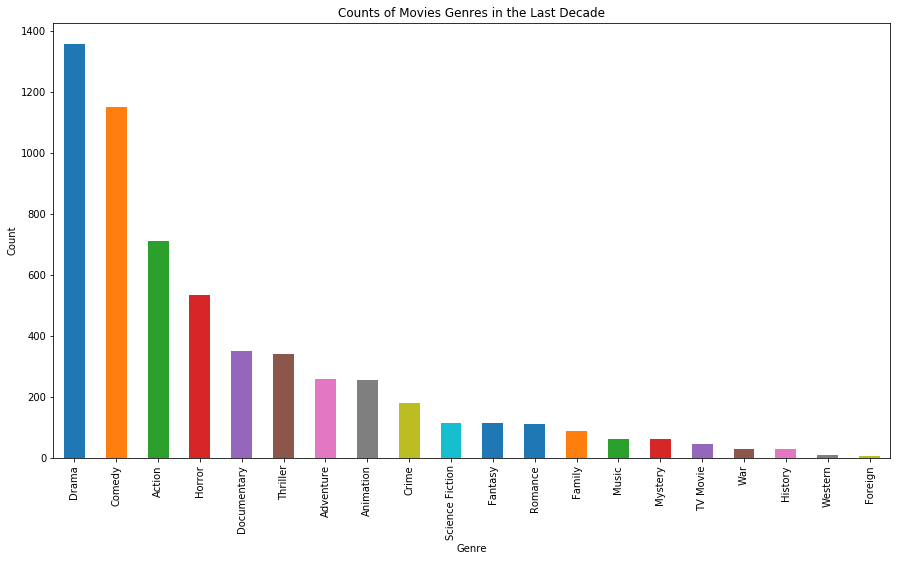

In [418]:
df_2005_2015.first_genre.value_counts().plot(kind='bar',figsize=(15,8));
plt.title('Counts of Movies Genres in the Last Decade')
plt.xlabel('Genre')
plt.ylabel('Count')


### Research Question 2 : What is the difference between the properties associated with high revenue movies and low revenue ones?

**Note: from now on any time I investigate a budget, a revenue or both I will work with the (3854, 16) shaped dataframe created in step 7 in the data cleaning process**

In [419]:
# I will consider the movies with high revenues ae those with revenue higher than the mean
mean_revenue=df_compelete_revenue_budget.revenue_adj.mean()
print('mean_revenue = ',mean_revenue)
high_revenue_movies = df_compelete_revenue_budget[df_compelete_revenue_budget['revenue_adj']>=mean_revenue]
low_revenue_movies = df_compelete_revenue_budget[df_compelete_revenue_budget['revenue_adj']<mean_revenue]
#check
high_revenue_movies.min()   

mean_revenue =  137064690.303


popularity                   0.131526
budget                            113
revenue                      25000000
original_title              10,000 BC
runtime                            69
genres                         Action
release_date                   1/1/15
vote_count                         13
vote_average                      4.1
release_year                     1960
budget_adj                    224.803
revenue_adj               1.37127e+08
date              1970-01-24 00:00:00
profit_adj               -2.24999e+07
first_genre                    Action
dtype: object

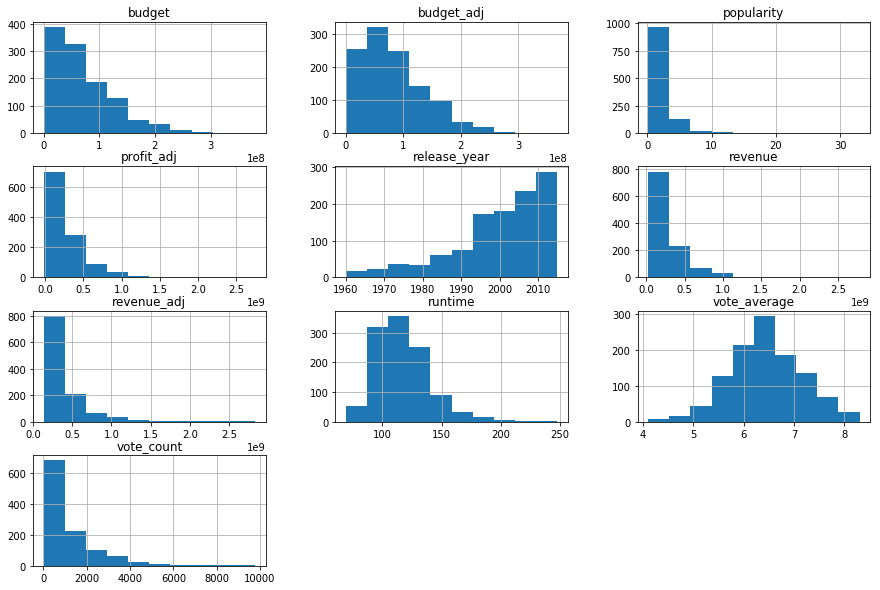

In [420]:
#checking high_revenue_movies properties
high_revenue_movies.hist(figsize=(15,10));

Text(0,0.5,'Count')

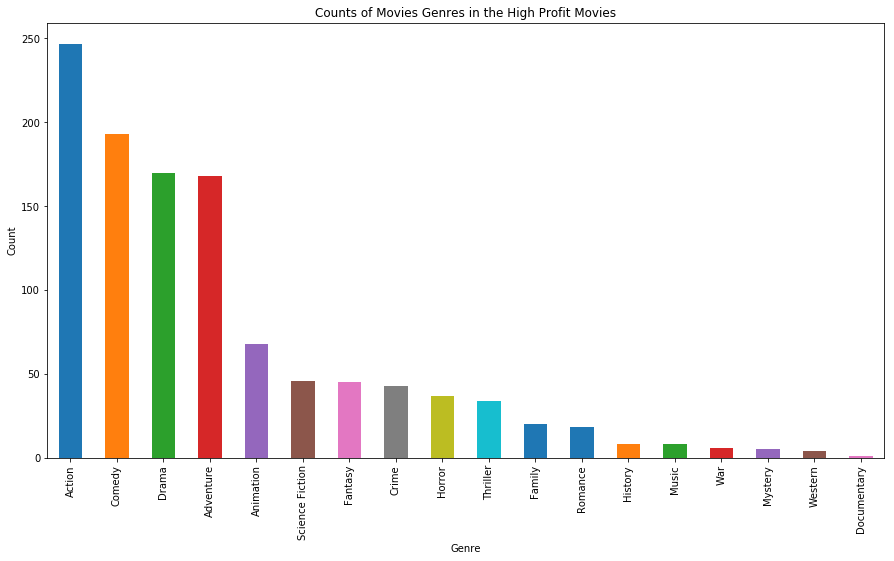

In [421]:
high_revenue_movies.first_genre.value_counts().plot(kind='bar',figsize=(15,8));
plt.title('Counts of Movies Genres in the High Profit Movies')
plt.xlabel('Genre')
plt.ylabel('Count')


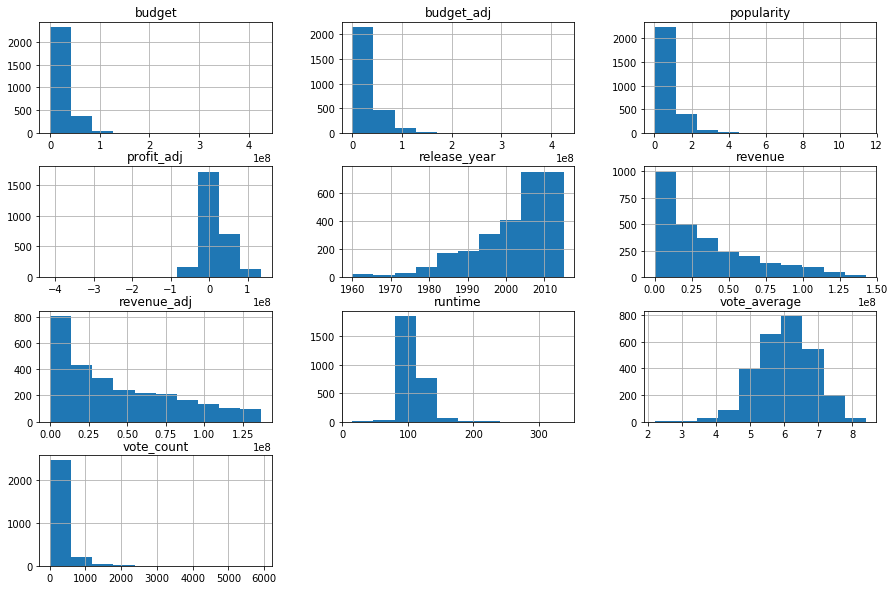

In [422]:
#checking low_revenue_movies properties

low_revenue_movies.hist(figsize=(15,10));

Text(0,0.5,'Count')

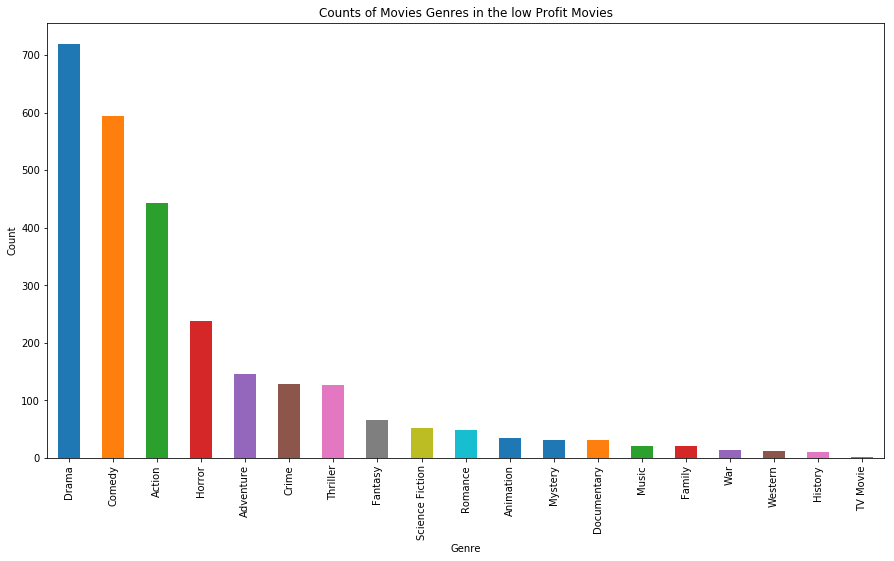

In [423]:
low_revenue_movies.first_genre.value_counts().plot(kind='bar',figsize=(15,8));
plt.title('Counts of Movies Genres in the low Profit Movies')
plt.xlabel('Genre')
plt.ylabel('Count')

### Research Question 3 : Is there a relation between budget and revenue? (in other words can we assume that the more you spend on a movie the higher its outcome?)

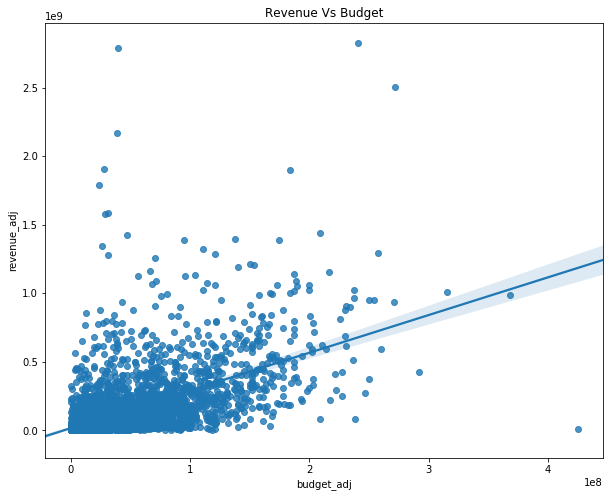

In [424]:
plt.figure(figsize=(10,8))
#title of the line plot
plt.title('Revenue Vs Budget')
sns.regplot(df_compelete_revenue_budget['budget_adj'],df_compelete_revenue_budget['revenue_adj']);

### Research Question 4 : What is the profit behaviour through the years?

Text(0,0.5,'Profits')

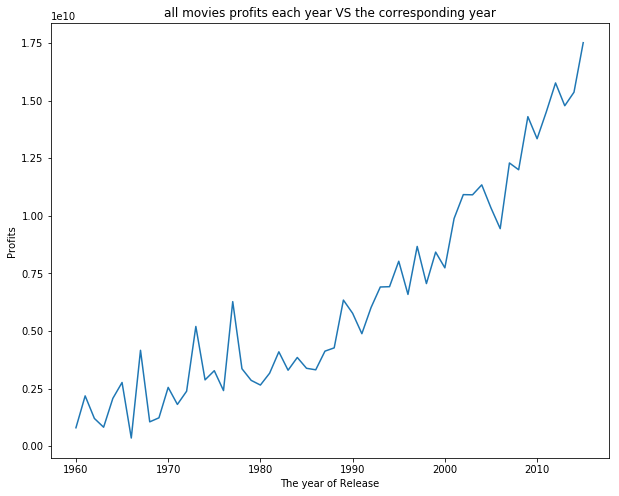

In [425]:
# If we want to look at the profit behaiour through the years, and since the range is big (more than 50 years) the best way is
# to group by the year of release and compare from year to the other
profit_per_year = df_compelete_revenue_budget.groupby('release_year')['profit_adj'].sum()

plt.figure(figsize=(10,8))
plt.plot(profit_per_year);

plt.title('all movies profits each year VS the corresponding year')
plt.xlabel('The year of Release')
plt.ylabel('Profits')



### Research Question 5 : Is there a relation between popularity and profit?

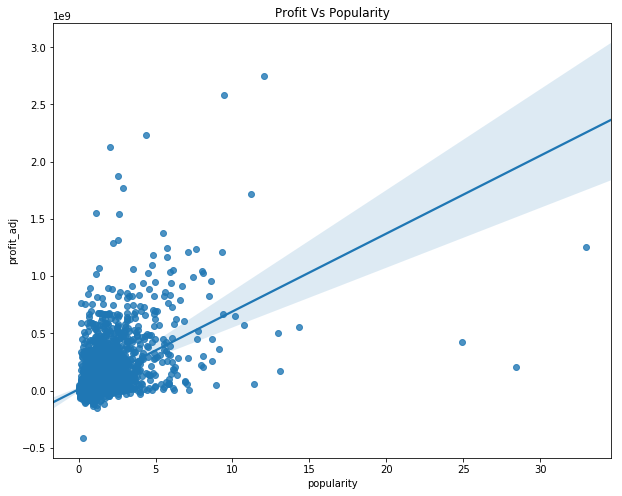

In [426]:
#df_compelete_revenue_budget.plot(x='popularity',y='profit_adj',kind='scatter');
plt.figure(figsize=(10,8))
#title of the line plot
plt.title('Profit Vs Popularity')
sns.regplot(df_compelete_revenue_budget['popularity'],df_compelete_revenue_budget['profit_adj']);

<a id='conclusions'></a>
## Conclusions

**Findings**:
>**Question 1**: Drama followed by Comedy then Action Seem to be the most common over the final recorded decade (from 2005 till 2015) as opposed to Foriegn which is the least common followed by Western then History.

>**QueStion 2**: The most obvious property showing difference between high revenue movies and low revenue ones is the budget,
the budget_adj in high revenue movies is less skewed to the right which means more high budget movie, this is intuitive as expected.

>**QueStion 3**: The graph of the revenue vs the budget can be approximated using linear regresion and even though the relation is not sharp but an overall positive correlation can be shown, which makes sense.

>**QueStion 4**: The profit throughout the years shows an overall increasing behaviour, which is also expected as the movie industry has flourished over the past 2 decades.

>**QueStion 5**: like the relation between the revenue and the budget, the relation between profit and popularity is not very sharp but the overall relaton can be approximated as increasing correlation. 

>**Limitation**: The dataset has a huge amount of missing data when it comes to revenue, budget and accordingly profit. to clean the data I had to get rid of all the entries with these unrecoreded data which decreased the rows from more than 10000 to only 3854. There are outliers, like very high revenue movies that would affect the mean significantly resulting in unfair judgement.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [429]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0